In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
Xd,Yd=np.loadtxt("/Users/krishna/documents/circulate/pendulum.txt",unpack=True)

In [48]:
Xd,Yd

(array([ 0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
         0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
         0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
         0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
         0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
         0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
         0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
         0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
         0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
         0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99]),
 array([ 0.69004,  0.69497,  0.74252,  0.7536 ,  0.83568,  0.86789,
         0.84182,  0.85379,  0.85762,  0.8839 ,  0.89985,  0.98436,
         1.0244 ,  1.0572 ,  0.99077,  1.0058 ,  1.0727 ,  1.0943 ,
         1.1432 ,  1.1045 ,  1.1867 ,  1.1385 ,  1.2245 ,  1.2406 ,
         1.2071 

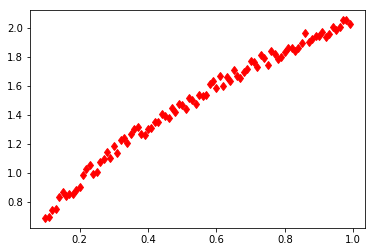

In [39]:
plt.plot(Xd,Yd, 'rd')

In [2]:
n_samples=len(Yd)
X=tf.placeholder(tf.float32, name='X')
Y=tf.placeholder(tf.float32,name='Y')
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

Y_predicted=X*w+b
loss=tf.square(Y-Y_predicted, name='loss')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


NameError: name 'tf' is not defined

In [46]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #train the model
    for i in range(500):
        total_loss=0
        for m in range(n_samples):
            x=Xd[m]
            y=Yd[m]
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y})
            total_loss+=l
        #print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        
    w,b=sess.run([w,b])

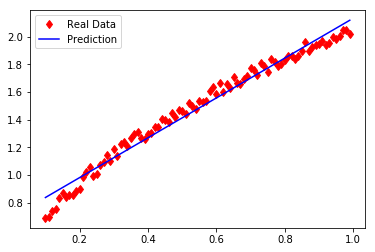

In [47]:
plt.plot(Xd,Yd,'rd')
plt.plot(Xd, Xd*w+b, 'b')
plt.legend(["Real Data", "Prediction"])